# The healthmate Reminder and Inquiry System 

In [1]:
# import necessary libraries 

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import timedelta

In [2]:
# loading the dataset 
df = pd.read_csv("healthdata .csv")

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.shape

(110527, 14)

In [6]:
# summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
mistake=df.query("Age==""-1")

In [8]:
mistake

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
df.drop(index=99832,inplace=True)

In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
# data cleaning or check for missing values 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [12]:
df.rename(columns = {"Hipertension" : "Hypertension" },inplace = True)
df.rename(columns = {"No-show" : "No_show"},inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
df["Scholarship"].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

## data visualization  

Text(0.5, 1.0, 'Correlation heatmap ')

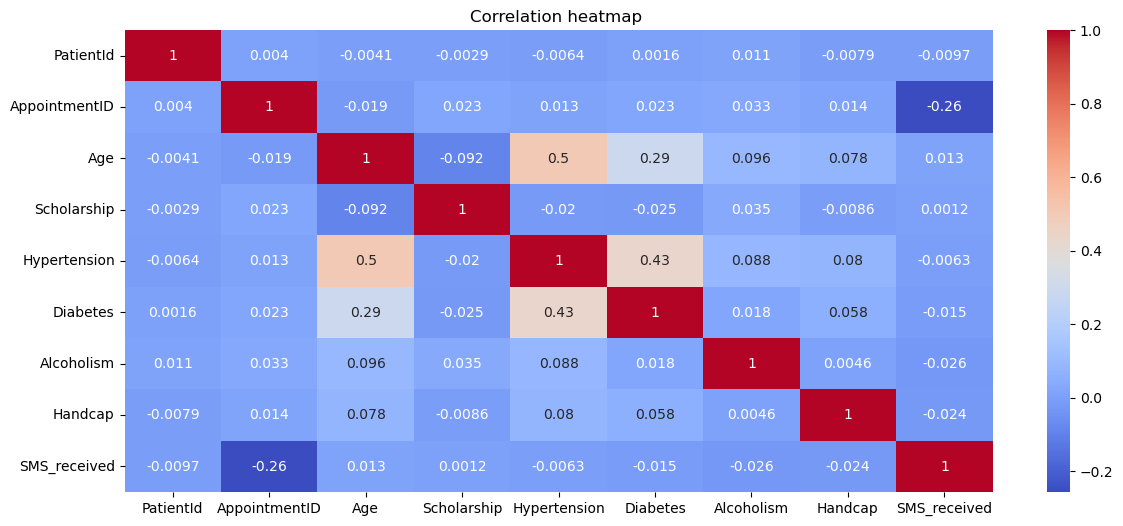

In [14]:
plt.figure(figsize=(14,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation heatmap ")


<AxesSubplot:xlabel='Gender', ylabel='count'>

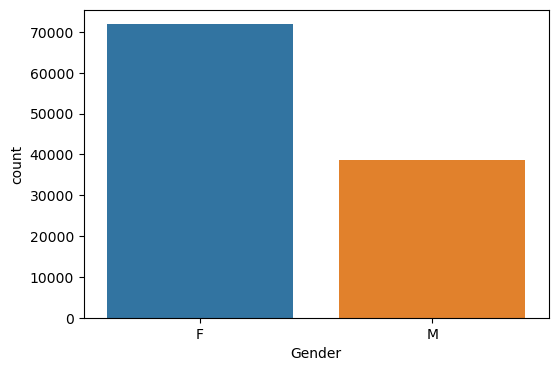

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')

Text(0.5, 1.0, 'patient age distribution')

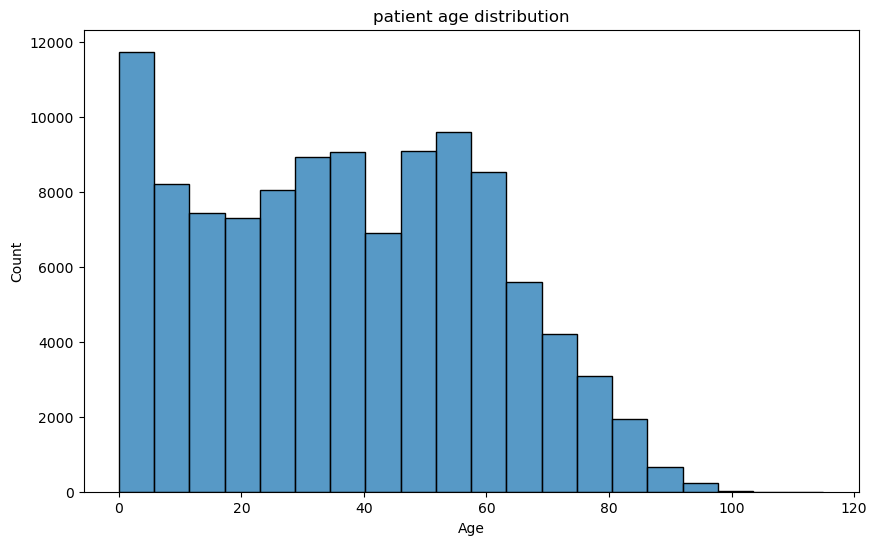

In [16]:
plt.figure(figsize=(10,6))
sns.histplot( data =df , x='Age',bins = 20)
plt.title("patient age distribution")

Text(0.5, 1.0, 'Appointment')

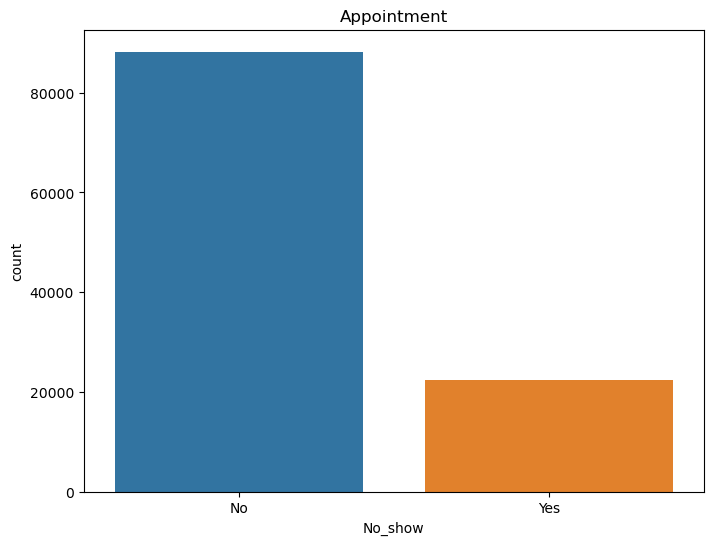

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='No_show')
plt.title("Appointment")

In [18]:
show=df["No_show"]=="No"
noshow=df["No_show"]=="Yes"


In [19]:
df[show].count()

PatientId         88207
AppointmentID     88207
Gender            88207
ScheduledDay      88207
AppointmentDay    88207
Age               88207
Neighbourhood     88207
Scholarship       88207
Hypertension      88207
Diabetes          88207
Alcoholism        88207
Handcap           88207
SMS_received      88207
No_show           88207
dtype: int64

In [20]:
df[noshow].count()

PatientId         22319
AppointmentID     22319
Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hypertension      22319
Diabetes          22319
Alcoholism        22319
Handcap           22319
SMS_received      22319
No_show           22319
dtype: int64

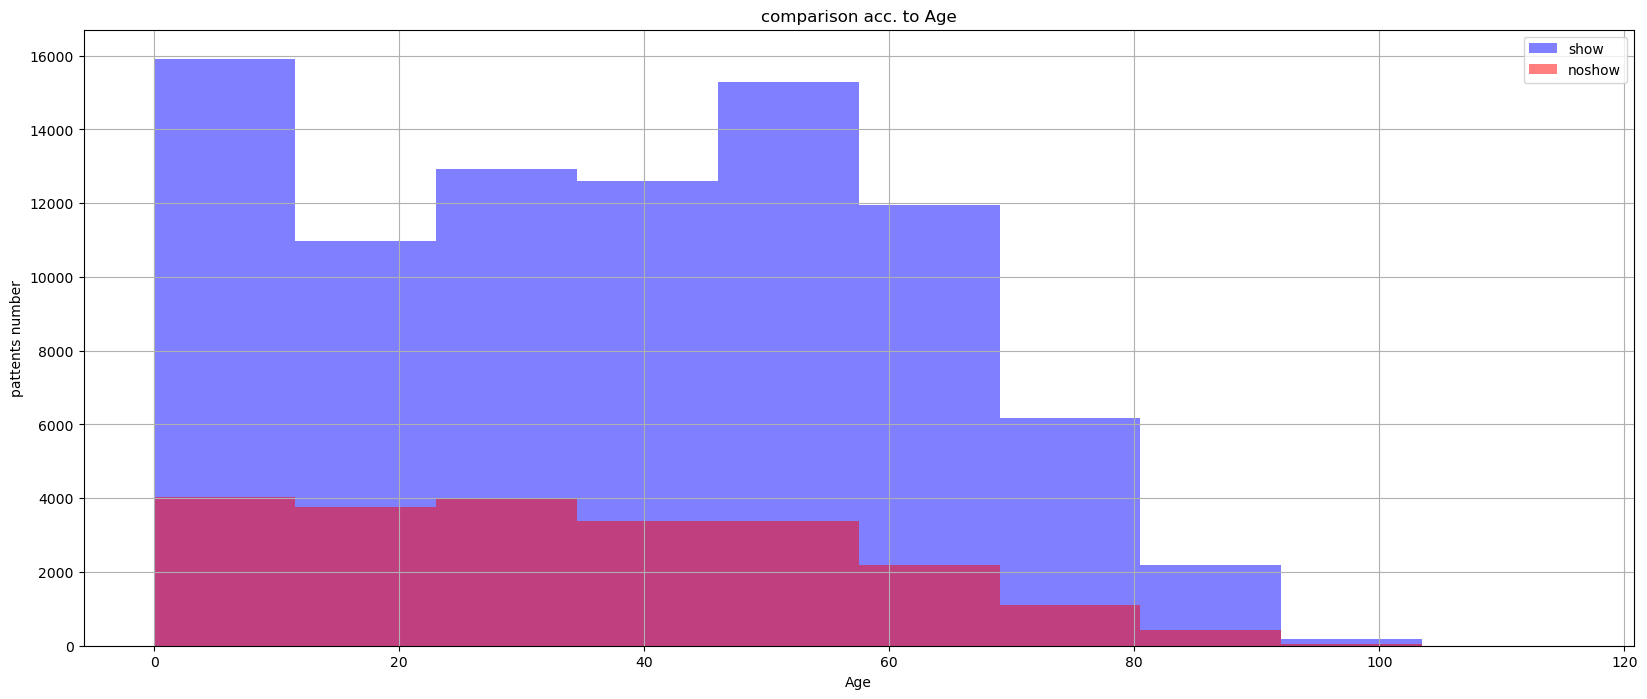

In [21]:
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[20,8])
    df[col_name][show].hist(alpha=0.5,bins=10,color="blue",label="show")
    df[col_name][noshow].hist(alpha=0.5,bins=10,color="red",label="noshow")
    plt.legend();
    plt.title("comparison acc. to Age")
    plt.xlabel("Age")
    plt.ylabel("pattents number")
attendance(df,"Age",show,noshow)

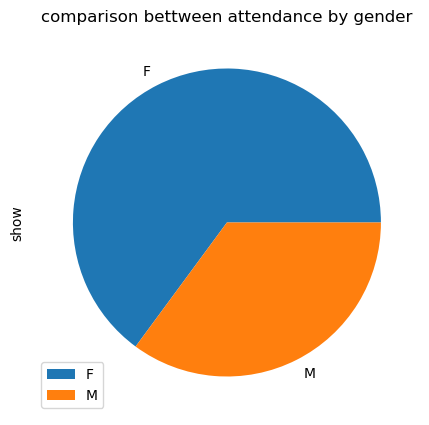

In [22]:
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[16,5])
    df[col_name][show].value_counts(normalize=True).plot(kind="pie",label="show")
    plt.legend();
    plt.title("comparison bettween attendance by gender")

attendance(df,"Gender",show,noshow)

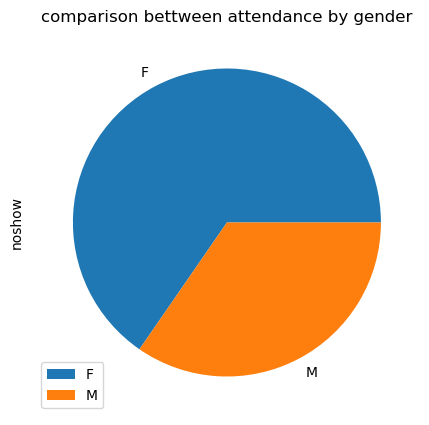

In [23]:
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[16,5])
    df[col_name][noshow].value_counts(normalize=True).plot(kind="pie",label="noshow")
    plt.legend();
    plt.title("comparison bettween attendance by gender")
attendance(df,"Gender",show,noshow)

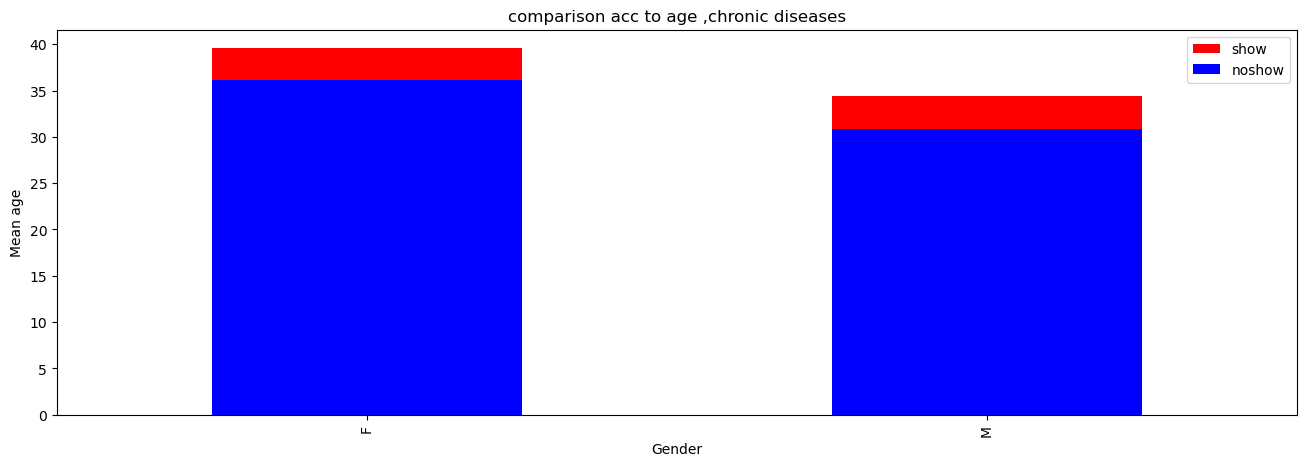

In [24]:
plt.figure(figsize=[16,5])
df[show].groupby("Gender").Age.mean().plot(kind="bar",color="red",label="show")
df[noshow].groupby("Gender").Age.mean().plot(kind="bar",color="blue",label="noshow")
plt.legend();
plt.title("comparison acc to age ,chronic diseases")
plt.xlabel("Gender")
plt.ylabel("Mean age");

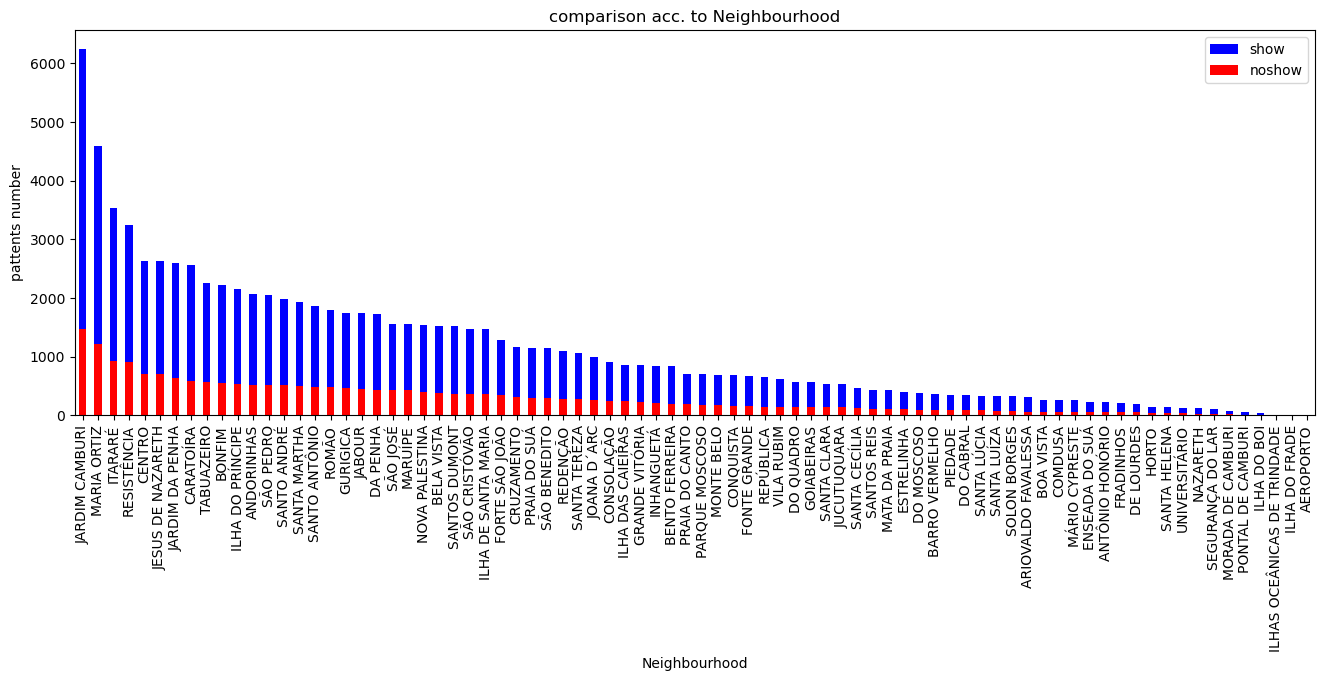

In [25]:
plt.figure(figsize=[16,5])
df.Neighbourhood[show].value_counts().plot(kind="bar",color="blue",label="show")
df.Neighbourhood[noshow].value_counts().plot(kind="bar",color="red",label="noshow")
plt.legend();
plt.title("comparison acc. to Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("pattents number");


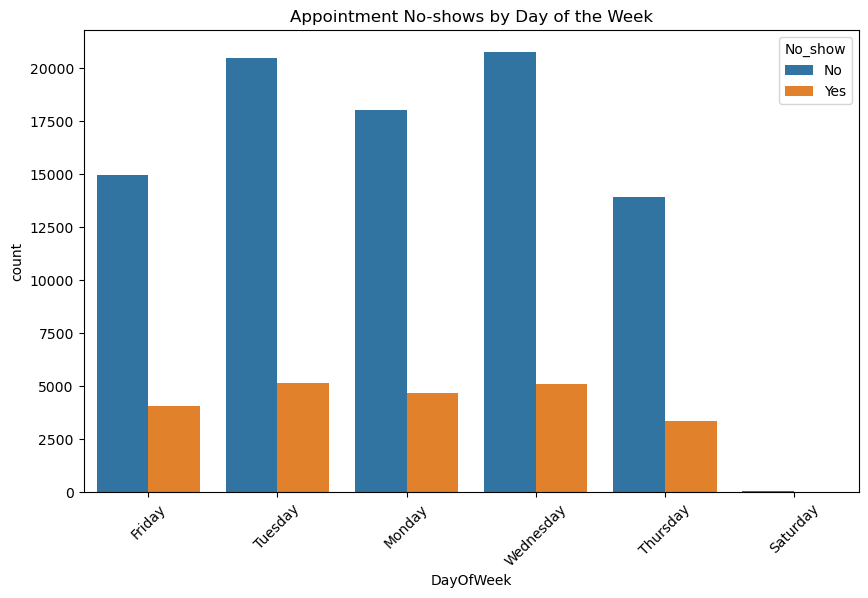

In [26]:
# Day of the Week Analysis
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['DayOfWeek'] = df['AppointmentDay'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayOfWeek', hue='No_show')
plt.title("Appointment No-shows by Day of the Week")
plt.xticks(rotation=45)
plt.show()


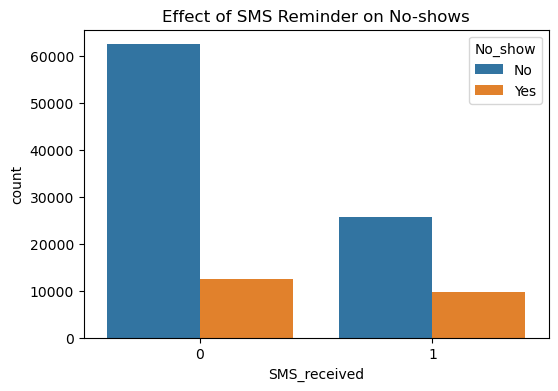

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SMS_received', hue='No_show')
plt.title("Effect of SMS Reminder on No-shows")
plt.show()

# Implementing virtual health assistant features

## Personalized Reminders

In [28]:
# Personalized Reminders

def send_reminder(appointment_date):
    reminder_date = appointment_date - timedelta(days=1)  # Sending reminder 1 day before the appointment
    return reminder_date

df['ReminderDate'] = df['AppointmentDay'].apply(send_reminder)

# Health Tips based on Age Group and Medical Conditions
def provide_health_tips(row):
    tips = []
    
    if row['Age'] == 'Children':
        tips.append("Encourage regular physical activity and a balanced diet.")
    
    if row['Hypertension'] == 1:
        tips.append("Monitor your blood pressure regularly and follow your doctor's recommendations.")
    
    if row['Diabetes'] == 1:
        tips.append("Maintain a healthy diet and closely manage your blood sugar levels.")
    
    return '\n'.join(tips)

df['HealthTips'] = df.apply(provide_health_tips, axis=1)

# Display personalized reminders and health tips for selected patients
sample_patients = df.sample(n=5)  # Select 5 random patients for demonstration

for index, row in sample_patients.iterrows():
    print(f"Patient: {row['PatientId']}")
    print(f"Reminder Date: {row['ReminderDate']}")
    print(f"Health Tips:\n{row['HealthTips']}")
    print("="*50)

Patient: 949848912468758.0
Reminder Date: 2016-05-23 00:00:00+00:00
Health Tips:
Monitor your blood pressure regularly and follow your doctor's recommendations.
Patient: 8451968527527.0
Reminder Date: 2016-05-10 00:00:00+00:00
Health Tips:

Patient: 3957731934896.0
Reminder Date: 2016-06-02 00:00:00+00:00
Health Tips:

Patient: 353894222394745.0
Reminder Date: 2016-05-10 00:00:00+00:00
Health Tips:

Patient: 9496196639835.0
Reminder Date: 2016-06-02 00:00:00+00:00
Health Tips:



## Interactive QnA System 

We've implemented a simple function answer_patient_questions that provides responses to patient questions based on certain keywords. In a real-world scenario, you would integrate more advanced natural language processing to handle a wider range of questions.

In [29]:
# Interactive Q&A System
def answer_patient_questions(question):
    # Placeholder logic for answering patient questions
    if "symptoms" in question.lower():
        return "If you're experiencing severe symptoms, please consult a medical professional immediately."
    elif "medication" in question.lower():
        return "Please follow your doctor's prescription and take the medication as directed."
    else:
        return "I recommend discussing this with your healthcare provider for accurate guidance."

# Simulating patient questions
sample_questions = [
    "What should I do if I experience symptoms?",
    "How should I take my medication?",
    "Can you tell me more about my medical condition?"
]

for question in sample_questions:
    answer = answer_patient_questions(question)
    print(f"Patient Question: {question}")
    print(f"Assistant Answer: {answer}")
    print("="*50)

Patient Question: What should I do if I experience symptoms?
Assistant Answer: If you're experiencing severe symptoms, please consult a medical professional immediately.
Patient Question: How should I take my medication?
Assistant Answer: Please follow your doctor's prescription and take the medication as directed.
Patient Question: Can you tell me more about my medical condition?
Assistant Answer: I recommend discussing this with your healthcare provider for accurate guidance.


## Insights based on Appointment history

We've created a function provide_insights that calculates and displays insights for each patient based on their appointment history. This can help patients understand their attendance patterns and adherence to appointments.

In [30]:
# Providing Insights based on Appointment History
def provide_insights(patient_id):
    patient_df = df[df['PatientId'] == patient_id]
    total_appointments = len(patient_df)
    no_show_count = patient_df['No_show'].apply(lambda x: 1 if x == 'Yes' else 0).sum()  # Convert to 1 or 0
    show_count = total_appointments - no_show_count
    
    insights = f"Patient Insights:\n"
    insights += f"Total Appointments: {total_appointments}\n"
    insights += f"Appointments Attended: {show_count}\n"
    insights += f"Appointments Missed: {no_show_count}\n"
    insights += f"Show-up Rate: {show_count/total_appointments:.2%}\n"
    
    return insights

# Display insights for selected patients
sample_patients = df['PatientId'].sample(n=3).unique()  # Select 3 random patients for demonstration

for patient_id in sample_patients:
    insights = provide_insights(patient_id)
    print(f"Patient ID: {patient_id}")
    print(insights)
    print("="*50)

Patient ID: 679957951325825.0
Patient Insights:
Total Appointments: 3
Appointments Attended: 3
Appointments Missed: 0
Show-up Rate: 100.00%

Patient ID: 53133168169317.0
Patient Insights:
Total Appointments: 6
Appointments Attended: 6
Appointments Missed: 0
Show-up Rate: 100.00%

Patient ID: 214683937135.0
Patient Insights:
Total Appointments: 5
Appointments Attended: 4
Appointments Missed: 1
Show-up Rate: 80.00%

